In [99]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

Generating Random Data

In [100]:
num_samples = 1000
data = {
    "Age": np.random.normal(loc=40,scale=10,size=num_samples).astype(int),
    "Income":np.random.normal(loc=50000,scale=10000,size=num_samples).astype(int)
}
df = pd.DataFrame(data)
df
    

,Age,Income
0,39,45897
1,49,60154
2,33,56435
3,44,45689
4,28,49206
...,...,...
995,36,55757
996,40,43074
997,45,61089
998,21,41676


In [101]:
# Introducing Null Values
df.loc[df.sample(frac=0.1).index, "Age"] = np.nan
# Introduce outliers
df.loc[df['Age'] > 70, 'Age'] = df['Age'] + 20

In [102]:
# Handling Null Values:
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [103]:
# Handling outliers (using z-score for example)
z_scores = stats.zscore(df['Age'])
df_no_outliers = df[(z_scores < 3)]

In [104]:
df

,Age,Income
0,39.0,45897
1,49.0,60154
2,33.0,56435
3,44.0,45689
4,28.0,49206
...,...,...
995,36.0,55757
996,40.0,43074
997,45.0,61089
998,21.0,41676


In [105]:
df["Age"] = df["Age"].round().astype(int)

In [106]:
df

,Age,Income
0,39,45897
1,49,60154
2,33,56435
3,44,45689
4,28,49206
...,...,...
995,36,55757
996,40,43074
997,45,61089
998,21,41676


In [107]:
num_bins = 5
bin_width = (df["Age"].max() - df["Age"].min())/ num_bins
bin_edges = [df['Age'].min() + i * bin_width for i in range(num_bins + 1)]
bin_labels = [f'{bin_edges[i]:.0f}-{bin_edges[i+1]:.0f}' for i in range(num_bins)]

# Perform equal width binning using cut() function
df['Age_Bin'] = pd.cut(df['Age'], bins=bin_edges, labels=bin_labels, right=False)

# Display the DataFrame with the new bin column
df

,Age,Income,Age_Bin
0,39,45897,35-47
1,49,60154,47-58
2,33,56435,24-35
3,44,45689,35-47
4,28,49206,24-35
...,...,...,...
995,36,55757,35-47
996,40,43074,35-47
997,45,61089,35-47
998,21,41676,13-24


In [108]:
bin_edges

[13.0, 24.2, 35.4, 46.599999999999994, 57.8, 69.0]

In [109]:
df['Age_Bin_qcut'] = pd.qcut(df['Age'], q=num_bins, labels=False, duplicates='drop')


In [110]:
df

,Age,Income,Age_Bin,Age_Bin_qcut
0,39,45897,35-47,2
1,49,60154,47-58,4
2,33,56435,24-35,1
3,44,45689,35-47,3
4,28,49206,24-35,0
...,...,...,...,...
995,36,55757,35-47,1
996,40,43074,35-47,2
997,45,61089,35-47,3
998,21,41676,13-24,0


In [111]:
scaler = MinMaxScaler()
df['Income_MinMax'] = scaler.fit_transform(df[['Income']])
df

,Age,Income,Age_Bin,Age_Bin_qcut,Income_MinMax
0,39,45897,35-47,2,0.496144
1,49,60154,47-58,4,0.689706
2,33,56435,24-35,1,0.639215
3,44,45689,35-47,3,0.493320
4,28,49206,24-35,0,0.541069
...,...,...,...,...,...
995,36,55757,35-47,1,0.630010
996,40,43074,35-47,2,0.457817
997,45,61089,35-47,3,0.702400
998,21,41676,13-24,0,0.438837


In [112]:
df['Income_Z_Score'] = scaler.fit_transform(df[['Income']])
df

,Age,Income,Age_Bin,Age_Bin_qcut,Income_MinMax,Income_Z_Score
0,39,45897,35-47,2,0.496144,0.496144
1,49,60154,47-58,4,0.689706,0.689706
2,33,56435,24-35,1,0.639215,0.639215
3,44,45689,35-47,3,0.493320,0.493320
4,28,49206,24-35,0,0.541069,0.541069
...,...,...,...,...,...,...
995,36,55757,35-47,1,0.630010,0.630010
996,40,43074,35-47,2,0.457817,0.457817
997,45,61089,35-47,3,0.702400,0.702400
998,21,41676,13-24,0,0.438837,0.438837


In [114]:
max_income_length = len(str(df['Income'].max()))

df['Income_DecimalScaled'] = df['Income'] / (10 ** max_income_length)
df

,Age,Income,Age_Bin,Age_Bin_qcut,Income_MinMax,Income_Z_Score,Income_DecimalScaled
0,39,45897,35-47,2,0.496144,0.496144,0.45897
1,49,60154,47-58,4,0.689706,0.689706,0.60154
2,33,56435,24-35,1,0.639215,0.639215,0.56435
3,44,45689,35-47,3,0.493320,0.493320,0.45689
4,28,49206,24-35,0,0.541069,0.541069,0.49206
...,...,...,...,...,...,...,...
995,36,55757,35-47,1,0.630010,0.630010,0.55757
996,40,43074,35-47,2,0.457817,0.457817,0.43074
997,45,61089,35-47,3,0.702400,0.702400,0.61089
998,21,41676,13-24,0,0.438837,0.438837,0.41676


In [117]:
five_num_summary = df['Income'].describe(percentiles=[.25, .5, .75])

five_num_summary = five_num_summary.round()
# Display the five-number summary
print("Five-Number Summary for Income:")
print(f"Minimum: {five_num_summary['min']}")
print(f"Q1 (25th percentile): {five_num_summary['25%']}")
print(f"Median (50th percentile): {five_num_summary['50%']}")
print(f"Q3 (75th percentile): {five_num_summary['75%']}")
print(f"Maximum: {five_num_summary['max']}")


Five-Number Summary for Income:
Minimum: 9353.0
Q1 (25th percentile): 43674.0
Median (50th percentile): 50963.0
Q3 (75th percentile): 57726.0
Maximum: 83009.0


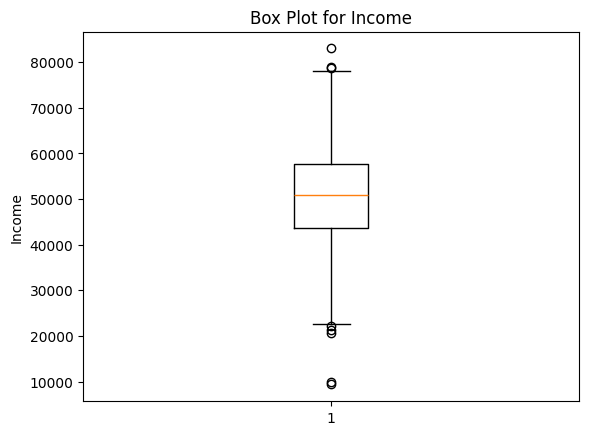

In [118]:
plt.boxplot(df['Income'])
plt.title('Box Plot for Income')
plt.ylabel('Income')
plt.show()
